In [1]:
import pandas as pd                       # importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("customer_analysis_new.csv") # readind the data for onward analyses
#file

In [3]:
#file.dtypes             # checking the data types to see list of objects and numeric values for insight

In [4]:
numerical = file.select_dtypes(np.number) # extracting numerical data from the main data for analyses
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [5]:
#xxxxx = numerical.columns[numerical.isna().any()].tolist()
print(numerical.isna().any())

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool


In [6]:
print(numerical.isnull().any())

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool


In [7]:
#mean_income = numerical['Income'].mean()
#numerical['Income'] = numerical['Income'].replace(0, numerical['Income'].mean())
#numerical['Number of Open Complaints'] = numerical['Number of Open Complaints'].replace(0, numerical['Number of Open Complaints'].mean())
#numerical['Months Since Last Claim'] = numerical['Months Since Last Claim'].replace(0, numerical['Months Since Last Claim'].mean())
#numerical['Months Since Policy Inception'] = numerical['Months Since Policy Inception'].replace(0, numerical['Months Since Policy Inception'].mean())
#numerical['Unnamed: 0'] = numerical['Unnamed: 0'].replace(0, numerical['Unnamed: 0'].mean())
#numerical = numerical.drop('Income', axis = 1)
#numerical = numerical.drop('Months Since Policy Inception', axis = 1)
#numerical = numerical.drop('Customer Lifetime Value', axis = 1)
#numerical = numerical.drop('Months Since Last Claim', axis = 1)

In [8]:
#numerical['Unnamed: 0 '] = numerical['Unnamed: 0 '].replace(0, numerical['Unnamed: 0 '].mean())

In [9]:
nonzero_counts = (numerical != 0).sum()
print(nonzero_counts)

customer_lifetime_value          9134
income                           6817
monthly_premium_auto             9134
months_since_last_claim          8820
months_since_policy_inception    9051
number_of_open_complaints        1882
number_of_policies               9134
total_claim_amount               9134
month                            9134
dtype: int64


In [83]:
categorical = file.select_dtypes(include = object)     # extracting categorical data

In [85]:
categorical.isna().values.any() # checking if NaN values exist

False

In [11]:
numerical.head()   # headings of the numerical data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


In [12]:
numerical.describe().T # transposing the data for further analyses especially with respect to correlation 

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [13]:
unknown_value = numerical['monthly_premium_auto'].tolist()
#print(unknown_value)

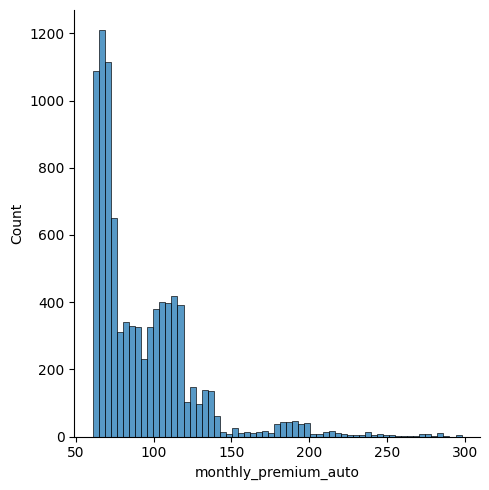

In [14]:
sns.displot(numerical['monthly_premium_auto']) # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
plt.show()

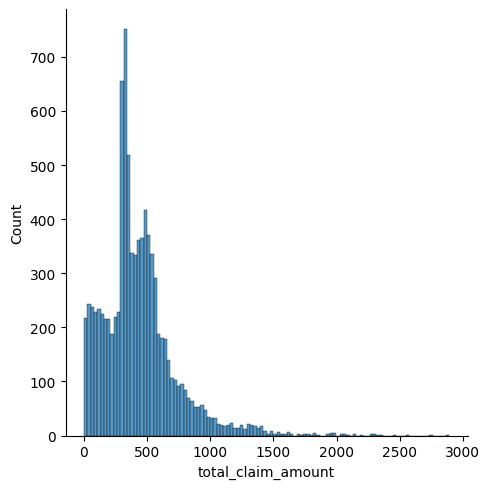

In [15]:
sns.displot(numerical['total_claim_amount'])    # distribution for 'Total Claim Amount'
#plt.show()

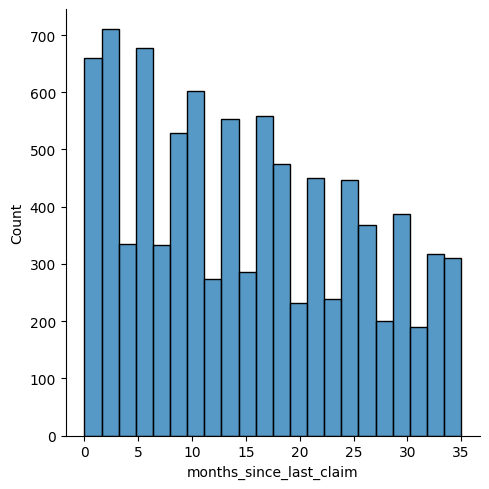

In [16]:
sns.displot(numerical["months_since_last_claim"]) # distribution for 'Monthly Premium Auto'
#plt.show

<Axes: >

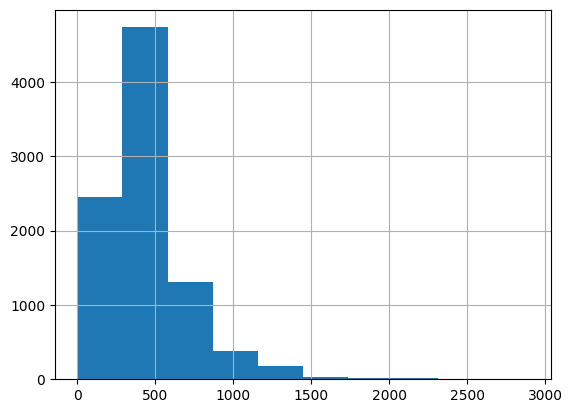

In [17]:
numerical["total_claim_amount"].hist()                    # histogrm for 'Total Claim Amount'
#plt.show

<Axes: xlabel='monthly_premium_auto'>

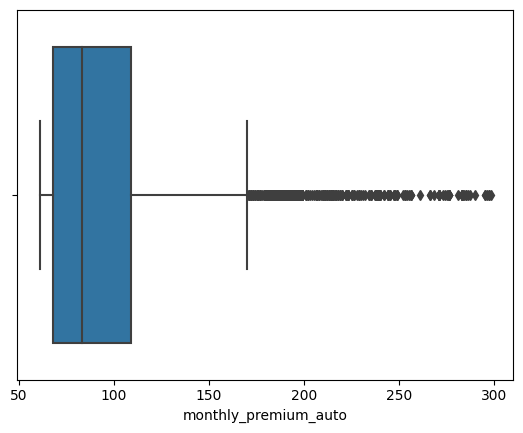

In [18]:
sns.boxplot(x=numerical['monthly_premium_auto'])  # boxplot for the assessment of errors in the data using the upper and lower limits as thresholds for determining outliers
#plt.show()

In [19]:
iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)
upper_limit = np.percentile(numerical['monthly_premium_auto'],75) + 0.44*iqr
lower_limit = np.percentile(numerical['monthly_premium_auto'],25) - 0.00045*iqr # finding upper and lower limits to used in refining the results

In [20]:
iqr


41.0

In [21]:
upper_limit

127.03999999999999

In [22]:
lower_limit

67.98155

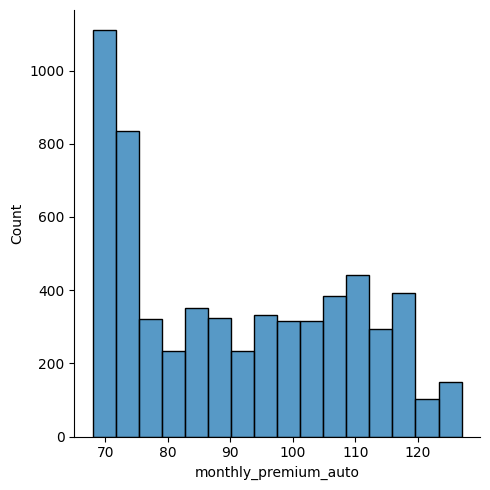

In [23]:
numerical1 = numerical[(numerical['monthly_premium_auto']>lower_limit) & (numerical['monthly_premium_auto']<upper_limit)].copy()
sns.displot(numerical1['monthly_premium_auto'])
#plt.show()   # applying the result to determine if the data can is normally distributed after cleaning; but not so good

<Axes: xlabel='total_claim_amount'>

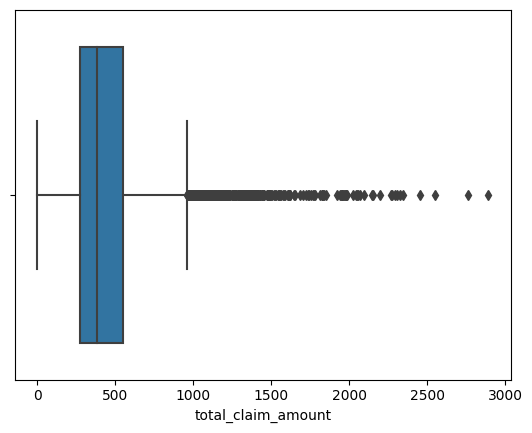

In [24]:
sns.boxplot(x=numerical['total_claim_amount'])    # boxplot for 'Total Claim Amount'
#plt.show()

In [25]:
iqr = np.percentile(numerical['total_claim_amount'],75) - np.percentile(numerical['total_claim_amount'],25)
upper_limit = np.percentile(numerical['total_claim_amount'],75) + 0.9*iqr
lower_limit = np.percentile(numerical['total_claim_amount'],25) - 0.51*iqr   # same as above, but for 'Total Claim Amount'

In [26]:
iqr

275.25659425

In [27]:
upper_limit

795.2457735749999

In [28]:
lower_limit

131.8773814325

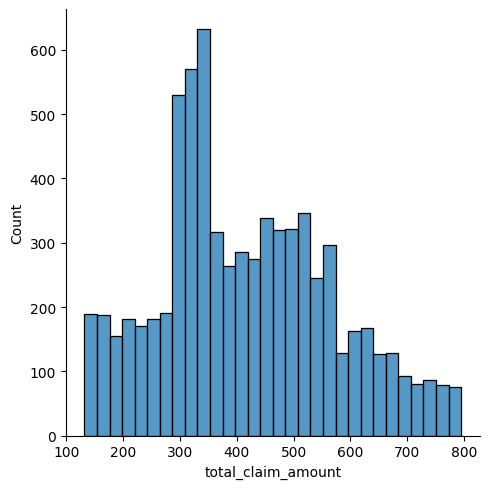

In [29]:
numerical1 = numerical[(numerical['total_claim_amount']>lower_limit) & (numerical['total_claim_amount']<upper_limit)].copy()
sns.displot(numerical1['total_claim_amount'])   # normality not so good
#plt.show()

In [30]:
numerical1 = numerical.drop("total_claim_amount", axis = 1) # 'Total Claim Amount' dropped from DataFrame in order to use only the features alone for further nalyses and prediction
numerical1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,1
9130,19228.463620,0,187,14.0,32,0.0,2,2
9131,5259.444853,61146,65,7.0,68,0.0,6,1
9132,23893.304100,39837,201,11.0,63,0.0,2,2


In [31]:
correlations_matrix = numerical1.corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


<Axes: >

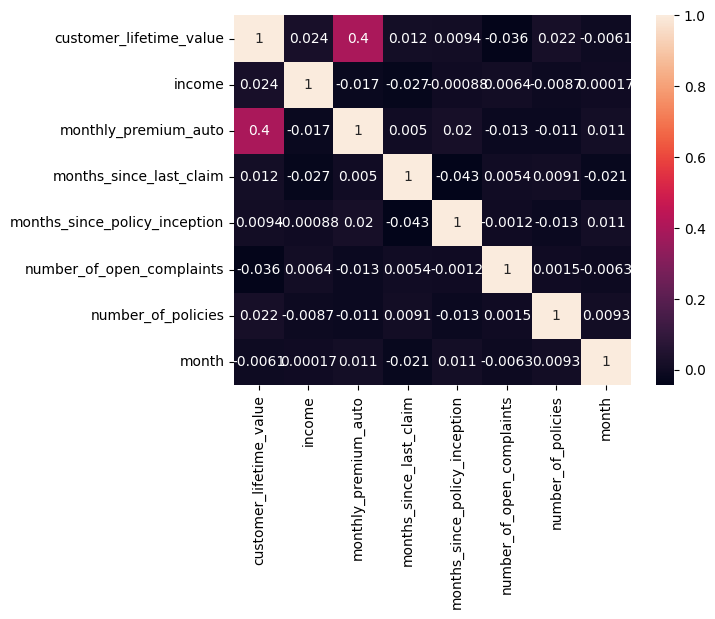

In [32]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation. with black showing the least correlated pairs. Correlation here is very low for all except self correlated pairs 
#plt.show()

# Splitting and Scaling the Data

In [33]:
import math
from sklearn import linear_model

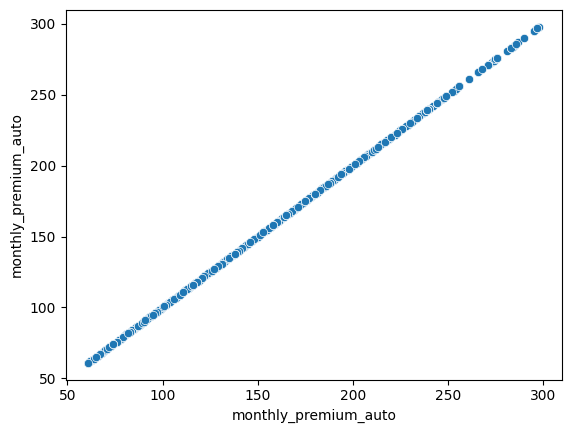

In [115]:
sns.scatterplot(x=numerical1['monthly_premium_auto'], y=numerical['monthly_premium_auto'], data = file)
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler # # importing libraries for trnaformation
from sklearn.preprocessing import StandardScaler

In [117]:
y = numerical['total_claim_amount']                       #splitting X and y
X = numerical1
X.fillna(0, inplace = True)
X_num = X.select_dtypes(include = np.number)
X_cat = categorical.select_dtypes(object)         

In [118]:
#X_num.fillna(0.1, inplace = True)
#X_num


In [119]:
transformer = MinMaxScaler().fit(X_num) # normalising numerical
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 8)


In [120]:
#pd.DataFrame(x_normalized, columns=X_num.columns).corr()

In [121]:
#transformer = StandardScaler().fit(X_num) # alternative method for normalising the data
#x_standardized = transformer.transform(X_num)
#print(x_standardized.shape)
#pd.DataFrame(x_standardized, columns=X_num.columns)

In [122]:
pd.DataFrame(x_normalized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
month,9134.0,0.463762,0.498712,0.0,0.000000,0.000000,1.000000,1.0


In [123]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder
X_cat = X_cat[['response', 'gender', 'vehicle_type']]
encoder = OneHotEncoder(drop='first')
encoder = encoder.fit(X_cat)
encoded_cat = encoder.transform(X_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,response_Yes,gender_M,vehicle_type_M
0,0.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,0.0,0.0,1.0


In [124]:
x_x_normalized = pd.DataFrame(x_normalized)
onehot_encoded = pd.DataFrame(onehot_encoded)
X_treated = pd.concat([x_normalized, onehot_encoded], axis=1)
X_treated

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_Yes,gender_M,vehicle_type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,1.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,1.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0,1.0,0.0
9130,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0,1.0,0.0
9131,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,0.0
9132,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,1.0


In [125]:
#X = x_normalized
#X.fillna(X.mean(), inplace = True)


In [126]:
#y = numerical['Total Claim Amount'] 
#y.head()

In [127]:
#print(numerical['Total Claim Amount'].isnull().any())

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 11)
(1827, 11)
(7307,)
(1827,)


In [129]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_Yes,gender_M,vehicle_type_M
5123,0.009354,0.000000,0.109705,0.114286,0.040404,0.6,0.000,1.0,1.0,0.0,1.0
7738,0.075385,0.000000,0.215190,0.200000,0.424242,0.0,1.000,1.0,0.0,0.0,0.0
214,0.044826,0.678109,0.033755,0.028571,0.787879,0.0,1.000,0.0,1.0,1.0,1.0
8580,0.138773,0.000000,0.029536,0.542857,0.020202,0.6,0.125,0.0,1.0,0.0,1.0
7857,0.071306,0.490973,0.151899,0.114286,0.464646,0.0,0.250,1.0,0.0,1.0,1.0


In [130]:
y_train.head()

5123    420.041981
7738    806.400000
214     331.200000
8580    326.400000
7857    698.400000
Name: total_claim_amount, dtype: float64

In [131]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [132]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5218391407913792

In [133]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5285873397107748

In [134]:
y_test[:5]

708     456.523850
47      406.902001
3995    128.516525
1513    110.868874
3686    106.737787
Name: total_claim_amount, dtype: float64

In [135]:
predictions_test[:5]

array([658.60133454, 207.5290111 , 180.85360928, 183.66550622,
       216.52651654])

In [136]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

41209.77473662514

In [137]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

203.0019082093199

In [138]:
from sklearn.metrics import mean_absolute_error, r2_score

In [139]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

144.91980822164714


In [140]:
y_test.mean()

432.42788232183904

In [141]:
rmse = math.sqrt(mse)
print(rmse)

203.0019082093199


In [142]:
r2 = r2_score(y_test, predictions_test)
r2

0.5285873397107748